### Name : Shivang Gupta
### Roll No : 3055
### Deep Learning Assignment No : 4
### Problem Statement :  Use Autoencoder to implement anomaly detection. Build the model by using:
#### a. Import required libraries
#### b. Upload / access the dataset
#### c. Encoder converts it into latent representation
#### d. Decoder networks convert it back to the original input
#### e. Compile the models with Optimizer, Loss, and Evaluation Metrics           


An autoencoder is a type of artificial neural network used in deep learning for unsupervised learning, dimensionality reduction, and anomaly detection.It's a self-supervised learning algorithm that aims to encode the input data into a compressed representation and then decode it to reconstruct the original data. The key components of an autoencoder are as follows:
a) Encoder -  reduces network dimensionality
b) Latent Space - lower-dimensional representation of the input data. It captures essential features and patterns from the data.
c) Decoder - The decoder network takes the encoded representation from the latent space and attempts to reconstruct the original data by learning the reverse transformations. 


#### Installing required packages

In [1]:
!pip install tensorflow --user
!pip install keras
!pip install daytime
!pip install torch

#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # The StandardScaler is used for standardizing features
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

In [3]:
RANDOM_SEED = 2021  #  It's used as a seed for random number generators 
TEST_PCT = 0.3  # 30% of the data will be used for testing, and the remaining 70% is assumed to be used for training.
LABELS = ["Normal","Fraud"]

#### Load the Dataset

In [4]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#### Checking for null values

In [5]:
print("Any nulls in the dataset : ",df.isnull().values.any())

Any nulls in the dataset :  False


#### Describe data

In [6]:
print(list(df.columns))
df.describe()

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Unique Lables

In [7]:
print("No. of unique labels ", len(df['Class'].unique()))
print("Label values ",df.Class.unique())

No. of unique labels  2
Label values  [0 1]


In [8]:
#0 is for normal credit card transaction
#1 is for fraudulent credit card transaction
print("Break down of the Normal and Fraud Transactions")
print(pd.value_counts(df['Class'], sort = True))

Break down of the Normal and Fraud Transactions
Class
0    284315
1       492
Name: count, dtype: int64


#### Visualizing the imbalanced dataset

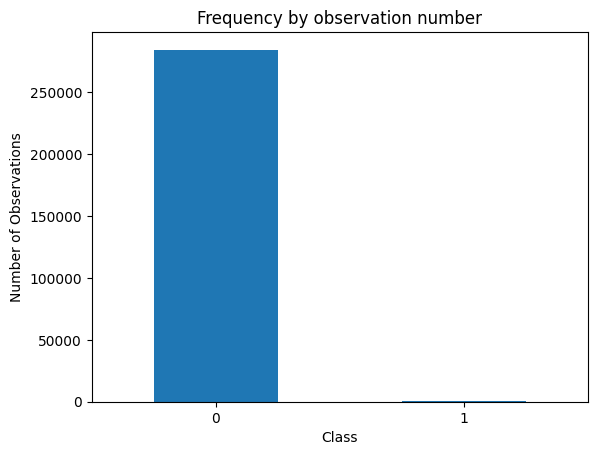

In [9]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar',rot=0) # rot=0 keeps the x-axis labels horizontal
plt.xticks(range(len(df['Class'].unique())), df.Class.unique())
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

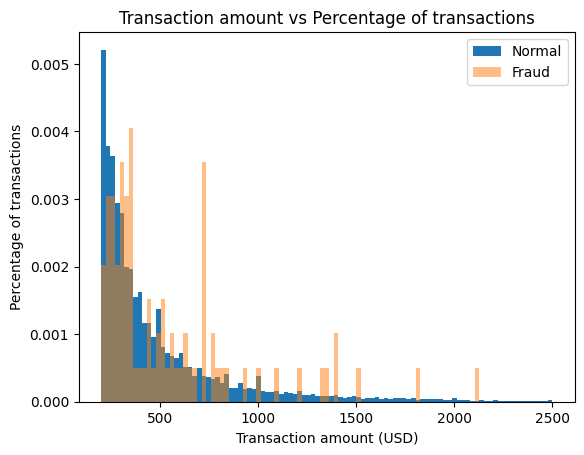

In [10]:
# Save the normal and fradulent transactions in separate dataframe
normal_dataset = df[df.Class == 0] 
fraud_dataset = df[df.Class == 1]
#Visualize transactionamounts for normal and fraudulent transactions
bins = np.linspace(200, 2500, 100) # Define bins for the histogram.  It tells Matplotlib how to group the data into bins for the histogram.
plt.hist(normal_dataset.Amount, bins=bins, alpha=1, density=True, label= 'Normal')  # alpha - transparency of the bars 
plt.hist(fraud_dataset.Amount, bins=bins, alpha=0.5, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Transaction amount vs Percentage of transactions")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions");
plt.show()

#### Scaling Time and Amount

In [11]:
sc=StandardScaler()    # scale and standardize the data.
df['Time'] = sc.fit_transform(df['Time'].values.reshape(-1, 1)) # calculates the mean and standard deviation of the data and then scales the data accordingly
df['Amount'] = sc.fit_transform(df['Amount'].values.reshape(-1, 1)) # reshape(-1, 1) operation is used to reshape a one-dimensional NumPy array into a two-dimensional array with one column

In [12]:
'''The last column in the dataset is our target variable.'''

raw_data = df.values
# The last element contains if the transaction is normal which is represented by a 0 and if fraud then 1
labels = raw_data[:, -1]  # last column
# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1] # It includes all columns except the last one, which contains the labels


# Split the data into training and testing sets
# Here, 80% of the data will be used for training (train_data and train_labels)
# and 20% for testing (test_data and test_labels)
# The random_state parameter ensures reproducibility
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=2021
)

#### Normalize the data to have a value between 0 and 1

In [13]:
# These lines use TensorFlow (imported as tf) to calculate the minimum and maximum values in the train_data. These values will be used to perform min-max scaling on the data, which scales the data to a range of [0, 1].
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val) # min-max scaling 
test_data = (test_data - min_val) / (max_val - min_val)  #  min-max scaling 
train_data = tf.cast(train_data, tf.float32) # These lines cast the data to the tf.float32 data type.
test_data = tf.cast(test_data, tf.float32)

In [14]:
'''Use only normal transactions to train the Autoencoder.

Normal data has a value of 0 in the target variable. Using the target variable to create a normal and fraud dataset.'''

# These lines cast the train_labels and test_labels as boolean arrays for binary classification tasks
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

#creating normal and fraud datasets

normal_train_data = train_data[~train_labels] # This line creates the normal_train_data dataset by selecting the rows where the corresponding labels are False (indicating normal transactions).
normal_test_data = test_data[~test_labels]
fraud_train_data = train_data[train_labels] #  This line creates the fraud_train_data dataset for training, selecting the rows with True labels (indicating fraud transactions).
fraud_test_data = test_data[test_labels]
print(" No. of records in Fraud Train Data=",len(fraud_train_data))
print(" No. of records in Normal Train data=",len(normal_train_data))
print(" No. of records in Fraud Test Data=",len(fraud_test_data))
print(" No. of records in Normal Test data=",len(normal_test_data))

 No. of records in Fraud Train Data= 389
 No. of records in Normal Train data= 227456
 No. of records in Fraud Test Data= 103
 No. of records in Normal Test data= 56859


#### Training

In [15]:
nb_epoch = 50
batch_size = 64
input_dim = normal_train_data.shape[1] #num of columns, 30 # This parameter sets the input dimension of the neural network, which is equal to the number of columns in the normal_train_data dataset.
encoding_dim = 14 # The encoding dimension represents the number of neurons in the bottleneck or latent layer of an autoencoder
hidden_dim_1 = int(encoding_dim / 2) 
hidden_dim_2= 4  
learning_rate = 1e-7 # Learning rate is a hyperparameter that determines the step size for updating the model's weights during training. 

In [16]:
# Define the input layer for the autoencoder model with the specified input dimension
input_layer = tf.keras.layers.Input(shape=(input_dim,))

# Encoder Section
# Create the first encoder layer with "tanh" activation and L2 regularization
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh", 
                                activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)

# Add a dropout layer with a dropout rate of 20% to the encoder
encoder = tf.keras.layers.Dropout(0.2)(encoder)

# Create the second encoder layer with ReLU activation
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)

# Create the third encoder layer with activation using Leaky ReLU
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)

# Decoder Section
# Create the first decoder layer with ReLU activation
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)

# Add a dropout layer with a dropout rate of 20% to the decoder
decoder = tf.keras.layers.Dropout(0.2)(decoder)

# Create the second decoder layer with ReLU activation
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)

# Create the output layer of the autoencoder with "tanh" activation
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)

# Define the full autoencoder model by specifying its input and output layers
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)

# Print a summary of the autoencoder model's architecture
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 14)                434       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 4)                 32        
                                                                 
 dense_3 (Dense)             (None, 7)                 35        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0     

In [17]:
"""Define the callbacks for checkpoints and early stopping"""
# Define a ModelCheckpoint callback to save the best model during training
cp = tf.keras.callbacks.ModelCheckpoint(
    filepath="autoencoder_fraud.h5",  # Filepath for saving the model
    mode='min',  # Mode for monitoring (minimizing the monitored quantity)
    monitor='val_loss',  # The metric to monitor (validation loss)
    verbose=2,  # Verbosity level (2 for more information during training)
    save_best_only=True  # Save only the best model checkpoint
)

# Define an EarlyStopping callback to stop training if certain conditions are met
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # The metric to monitor (validation loss)
    min_delta=0.0001,  # Minimum change in monitored quantity to qualify as an improvement
    patience=10,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,  # Verbosity level (1 for more information during training)
    mode='min',  # Mode for monitoring (minimizing the monitored quantity)
    restore_best_weights=True  # Restore the model's best weights when training is stopped
)


#### Compiling Autoencoder

In [18]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

#### Train the Autoencoder

In [19]:
# This trains the autoencoder to reconstruct normal transactions
history = autoencoder.fit(
    normal_train_data,  # Input data
    normal_train_data,  # Target output data (reconstruction target)
    epochs=nb_epoch,  # Number of training epochs
    batch_size=batch_size,  # Batch size for each training iteration
    shuffle=True,  # Shuffle the training data for each epoch
    validation_data=(test_data, test_data),  # Validation data for monitoring
    verbose=1,  # Verbosity level (1 for more detailed training output)
    callbacks=[cp, early_stop]  # Callbacks for checkpoint and early stopping
).history  # Store training history (loss and metrics) in the 'history' variable

Epoch 1/50
3541/3554 [============================>.] - ETA: 0s - loss: 0.0038 - accuracy: 0.0530
Epoch 1: val_loss improved from inf to 0.00032, saving model to autoencoder_fraud.h5
3554/3554 [==============================] - 15s 4ms/step - loss: 0.0038 - accuracy: 0.0532 - val_loss: 3.1859e-04 - val_accuracy: 0.0024
Epoch 2/50
  27/3554 [..............................] - ETA: 14s - loss: 1.9170e-05 - accuracy: 0.0370

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3549/3554 [============================>.] - ETA: 0s - loss: 1.9769e-05 - accuracy: 0.0682
Epoch 2: val_loss did not improve from 0.00032
3554/3554 [==============================] - 11s 3ms/step - loss: 1.9774e-05 - accuracy: 0.0682 - val_loss: 3.2563e-04 - val_accuracy: 0.0024
Epoch 3/50
3546/3554 [============================>.] - ETA: 0s - loss: 1.9688e-05 - accuracy: 0.0627
Epoch 3: val_loss improved from 0.00032 to 0.00017, saving model to autoencoder_fraud.h5
3554/3554 [==============================] - 11s 3ms/step - loss: 1.9681e-05 - accuracy: 0.0627 - val_loss: 1.7346e-04 - val_accuracy: 0.0051
Epoch 4/50
3546/3554 [============================>.] - ETA: 0s - loss: 1.9559e-05 - accuracy: 0.0638
Epoch 4: val_loss improved from 0.00017 to 0.00008, saving model to autoencoder_fraud.h5
3554/3554 [==============================] - 12s 3ms/step - loss: 1.9553e-05 - accuracy: 0.0637 - val_loss: 8.4752e-05 - val_accuracy: 0.0051
Epoch 5/50
3540/3554 [============================>.] 

#### Visualizing

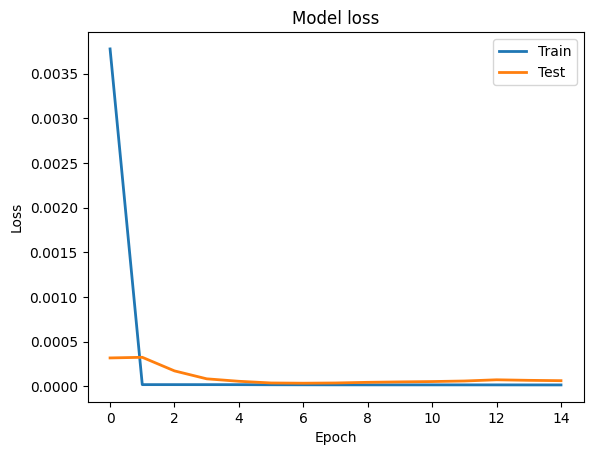

In [20]:
#Plot training and test loss

plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#### Detect Anomalies on test data

In [21]:
# Use the trained autoencoder to make predictions on the test data
test_x_predictions = autoencoder.predict(test_data)

# Calculate the Mean Squared Error (MSE) for each test data point
# This measures the difference between the original test data and its reconstruction
mse = np.mean(np.power(test_data - test_x_predictions, 2), axis=1)

# Create a DataFrame to store the reconstruction errors and true class labels
error_df = pd.DataFrame({
    'Reconstruction_error': mse,  # Reconstruction errors for each data point
    'True_class': test_labels  # True class labels (0 for normal, 1 for fraud)
})

1781/1781 [==============================] - 4s 2ms/step


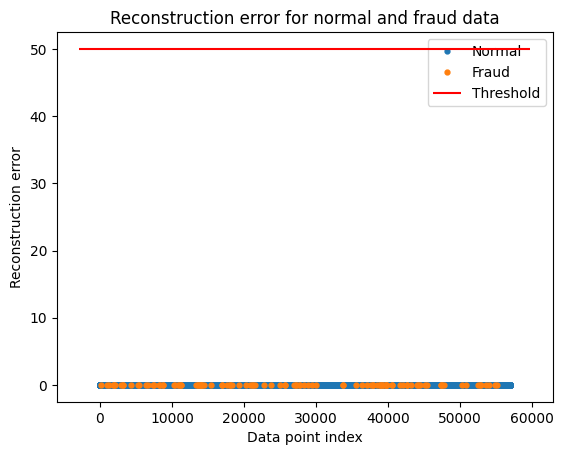

In [22]:
#Plotting the test data points and their respective reconstruction error sets a threshold value to visualize 
#if the threshold value needs to be adjusted.

# Define a fixed threshold value for anomaly detection
threshold_fixed = 50

# Group the data in 'error_df' by the 'True_class' (0 for normal, 1 for fraud)
groups = error_df.groupby('True_class')

# Create a new figure and axis for plotting
fig, ax = plt.subplots()

# Iterate through the grouped data and plot the reconstruction errors
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label="Fraud" if name == 1 else "Normal")

# Add a horizontal line at the fixed threshold value
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
# Add a legend to the plot indicating 'Normal' and 'Fraud'
ax.legend()
plt.title("Reconstruction error for normal and fraud data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

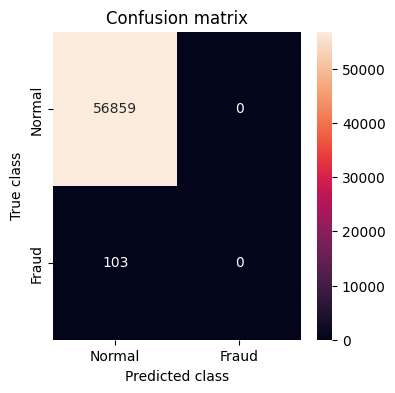

Accuracy:  0.9981917769741231
Recall:  0.0
Precision:  0.0


C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
'''Detect anomalies as points where the reconstruction loss is greater than a fixed threshold. 
Here we see that a value of 52 for the threshold will be good.

Evaluating the performance of the anomaly detection'''

# Define a fixed threshold for classifying anomalies
threshold_fixed = 52

# Create a list 'pred_y' where each element is 1 if the reconstruction error is greater than the threshold, else 0
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]

# Add a new column 'pred' to 'error_df' to store the predicted anomaly labels
error_df['pred'] = pred_y

# Calculate the confusion matrix by comparing the true class labels to the predicted labels
conf_matrix = confusion_matrix(error_df.True_class, pred_y)

# Create a new figure for plotting the confusion matrix
plt.figure(figsize=(4, 4))

# Use Seaborn to create a heatmap of the confusion matrix
# xticklabels and yticklabels are set to 'LABELS' (['Normal', 'Fraud']) for labeling
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")

# Set the title of the plot as 'Confusion matrix'
plt.title("Confusion matrix")

# Label the y-axis as 'True class'
plt.ylabel('True class')

# Label the x-axis as 'Predicted class'
plt.xlabel('Predicted class')

# Display the confusion matrix plot
plt.show()

# Calculate and print accuracy, recall, and precision scores
print("Accuracy: ", accuracy_score(error_df['True_class'], error_df['pred']))
print("Recall: ", recall_score(error_df['True_class'], error_df['pred']))
print("Precision: ", precision_score(error_df['True_class'], error_df['pred']))


#### Summarize

In [24]:
# "history" typically refers to an object that contains information about the training process. 
# This object stores various metrics, such as loss and accuracy, recorded at each training epoch.
history

{'loss': [0.003777529811486602,
  1.977358442672994e-05,
  1.968119977391325e-05,
  1.9552995581761934e-05,
  1.9331286239321344e-05,
  1.839789365476463e-05,
  1.7864305846160278e-05,
  1.7438043869333342e-05,
  1.7238686268683523e-05,
  1.7126269085565582e-05,
  1.702814915915951e-05,
  1.6934678569668904e-05,
  1.6867006706888787e-05,
  1.6559431969653815e-05,
  1.6480113117722794e-05],
 'accuracy': [0.053183913230895996,
  0.06816703081130981,
  0.06272421777248383,
  0.06374859064817429,
  0.09859489649534225,
  0.2572409510612488,
  0.264415979385376,
  0.259382039308548,
  0.2561594247817993,
  0.256009966135025,
  0.25768938660621643,
  0.2589643597602844,
  0.259773313999176,
  0.2645302712917328,
  0.26413020491600037],
 'val_loss': [0.00031859305454418063,
  0.00032562893466092646,
  0.00017346219101455063,
  8.475194772472605e-05,
  5.721966226701625e-05,
  3.834265953628346e-05,
  3.573723370209336e-05,
  3.8264599425019696e-05,
  4.5524106099037454e-05,
  5.04113850183784